In [1]:
import numpy as np
import wfdb as wf
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.utils import np_utils, multi_gpu_model
import tensorflow as tf
#from keras.callbacks import Tensorboard
np.set_printoptions(suppress=True)

trainD = np.load("/home/hsiehch/9s_overlapping/train_data.npy")
trainL = np.load("/home/hsiehch/9s_overlapping/train_label.npy")
validationD = np.load("/home/hsiehch/9s_overlapping/validation_data.npy")
validationL = np.load("/home/hsiehch/9s_overlapping/validation_label.npy")
testD = np.load("/home/hsiehch/9s_overlapping/test_data.npy")
testL = np.load("/home/hsiehch/9s_overlapping/test_label.npy")

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")

with tf.device('/cpu:0'):
    model = Sequential()
    lay_1 = model.add(Conv1D(filters = 16, kernel_size = 7, padding="same", input_shape = (trainData.shape[1], 1), activation = "relu"))
    lay_2 = model.add(MaxPooling1D(pool_size=2))
    lay_3 = model.add(Conv1D(filters = 32, kernel_size = 7, padding="same", activation = "relu"))
    lay_4 = model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    lay_7 = model.add(Conv1D(filters = 64, kernel_size = 7, padding="same", activation = "relu"))
    lay_8 = model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    lay_5 = model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    lay_6 = model.add(Dense(4, activation='softmax'))
    
print(model.summary())


parallel_model = multi_gpu_model(model, gpus=2)
parallel_model.compile(optimizer ='Adam', loss = "categorical_crossentropy", metrics=['accuracy'])
batch_s = 50
train_history_1 = parallel_model.fit(x = trainData, 
                          y = trainLabel,
                          epochs=100,
                          validation_data=(validationData, validationLabel),
                          batch_size=batch_s*2, 
                          verbose=1)
evaluation = parallel_model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))

print('Finish training!')

import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')

import keras.backend as K
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)

    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train Data: (28250, 2700, 1)
Train Label:  (28250, 4)
Vali Data:  (11301, 2700, 1)
Vali Label:  (11301, 4)
Test Data:  (16944, 2700, 1)
Test Label:  (16944, 4)
Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2700, 16)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1350, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1350, 32)          3616      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 675, 32)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 675, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 

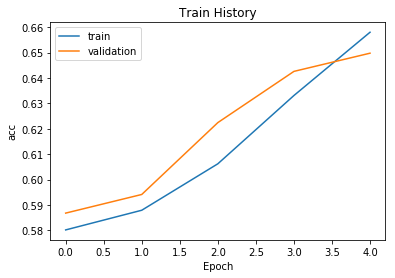

In [2]:
show_plot('acc', train_history_1)

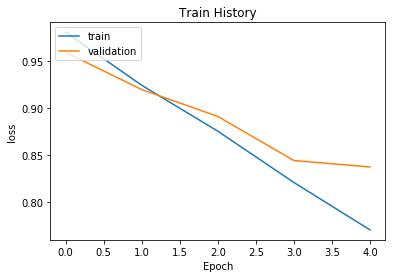

In [3]:
show_plot('loss', train_history_1)

In [26]:
layer_to_visualize(lay_1)

AttributeError: 'NoneType' object has no attribute 'output'